## Linear regression with ChatGPT for manufacturing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/gdrive


In [ ]:
# Import the libraries required for learning.
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam # Stochastic gradient descent

In [ ]:
# There are two files we will use, train_data.csv and test_data.csv
base_path = '/content/drive/My Drive/Linear_regression/Steel_alloy/' # Set the folder path where the data files are located
train_data_path = base_path + 'steel_alloy_train.csv' # Set the file path for train_data.csv

In [ ]:
x_train = pd.read_csv(train_data_path, usecols=['C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Mo', 'Cu', 'V', 'Al', 'N']) # Change the input columns according to your data
x_train = np.array(x_train) # Change the x_train data as array by numpy
print(x_train.shape)

(79, 12)


In [ ]:
# Read y1, and y2 column from train path data file
y_train = pd.read_csv(train_data_path, usecols=['0.2% Proof Stress', 'Tensile Strength']) # Change the output columns according to your data
y_train = np.array(y_train)/100 # Change the y_train data as array by numpy
print(y_train.shape)

(79, 2)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='linear', input_shape=(12,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='linear'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='linear'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=500, batch_size=16, verbose=1)

Epoch 1/500
5/5 [==============================] - 2s 8ms/step - loss: 25.6444
Epoch 2/500
5/5 [==============================] - 0s 6ms/step - loss: 23.2950
Epoch 3/500
5/5 [==============================] - 0s 5ms/step - loss: 20.8631
Epoch 4/500
5/5 [==============================] - 0s 6ms/step - loss: 18.0787
Epoch 5/500
5/5 [==============================] - 0s 5ms/step - loss: 15.1044
Epoch 6/500
5/5 [==============================] - 0s 6ms/step - loss: 12.2515
Epoch 7/500
5/5 [==============================] - 0s 7ms/step - loss: 10.1243
Epoch 8/500
5/5 [==============================] - 0s 5ms/step - loss: 9.3491
Epoch 9/500
5/5 [==============================] - 0s 5ms/step - loss: 9.5362
Epoch 10/500
5/5 [==============================] - 0s 5ms/step - loss: 9.2800
Epoch 11/500
5/5 [==============================] - 0s 6ms/step - loss: 8.8511
Epoch 12/500
5/5 [==============================] - 0s 5ms/step - loss: 8.6509
Epoch 13/500
5/5 [==============================] - 0s

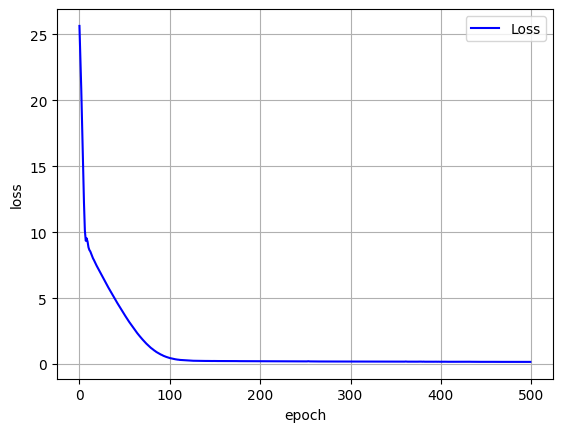

In [ ]:
import matplotlib.pyplot as plt

y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, c='blue', label='Loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
test_data_path = base_path + 'steel_alloy_test.csv' # Generate test data path

x_test = pd.read_csv(test_data_path, usecols=['C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Mo', 'Cu', 'V', 'Al', 'N']) # Generate x test data
x_test = np.array(x_test)

y_test = pd.read_csv(test_data_path, usecols=['0.2% Proof Stress', 'Tensile Strength']) # Generate y test data
y_test = np.array(y_test)
y_test

array([[290, 480],
       [275, 460],
       [285, 470],
       [382, 580],
       [290, 500],
       [570, 720],
       [525, 680],
       [310, 460],
       [320, 480],
       [420, 530],
       [380, 520],
       [343, 502],
       [530, 630],
       [305, 530],
       [270, 480],
       [655, 810]])

In [ ]:
result = model.predict(x_test)
result = result*100
print(result)

1/1 [==============================] - 0s 184ms/step
[[307.27963 406.45694]
 [326.65057 432.9865 ]
 [336.2248  446.09894]
 [429.7294  574.1586 ]
 [369.91965 492.24585]
 [534.587   717.7667 ]
 [523.07733 702.00366]
 [342.50537 454.70053]
 [333.85876 442.85855]
 [379.2439  505.01593]
 [381.28586 507.8125 ]
 [326.568   432.87338]
 [453.4278  606.6148 ]
 [369.74854 492.01154]
 [330.07294 437.67358]
 [607.188   817.1977 ]]


In [ ]:
error_ps = np.mean(np.abs(y_test[:,0] - result[:,0])/y_test[:,0]*100)
error_ts = np.mean(np.abs(y_test[:,1] - result[:,1])/y_test[:,1]*100)
print(error_ps)
print(error_ts)

11.51381400324947
5.167954960231178


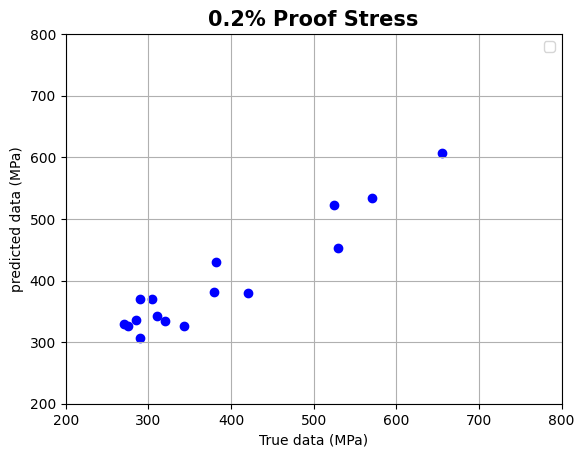

In [ ]:
plt.scatter(y_test[:,0], result[:,0], c='blue') # plot scatter with 1st column of output data
plt.legend(loc='upper right')
plt.grid()
plt.title('0.2% Proof Stress', fontweight = "bold", fontsize = 15)
plt.xlabel('True data (MPa)')
plt.ylabel('predicted data (MPa)')
plt.xlim([200, 800])
plt.ylim([200, 800])
plt.show()

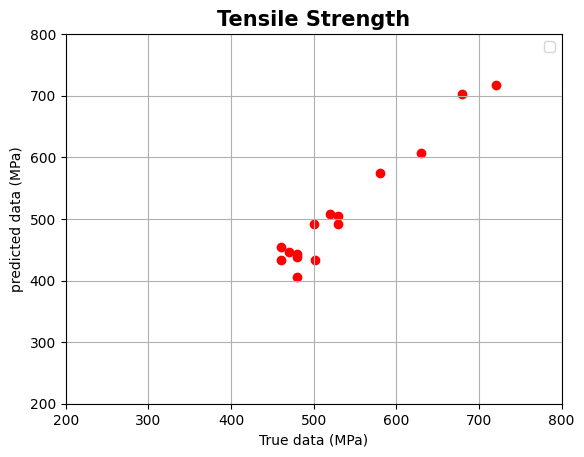

In [ ]:
plt.scatter(y_test[:,1], result[:,1], c='red') # plot scatter with 2nd column of output data
plt.legend(loc='upper right')
plt.grid()
plt.title('Tensile Strength', fontweight = "bold", fontsize = 15)
plt.xlabel('True data (MPa)')
plt.ylabel('predicted data (MPa)')
plt.xlim([200, 800])
plt.ylim([200, 800])
plt.show()

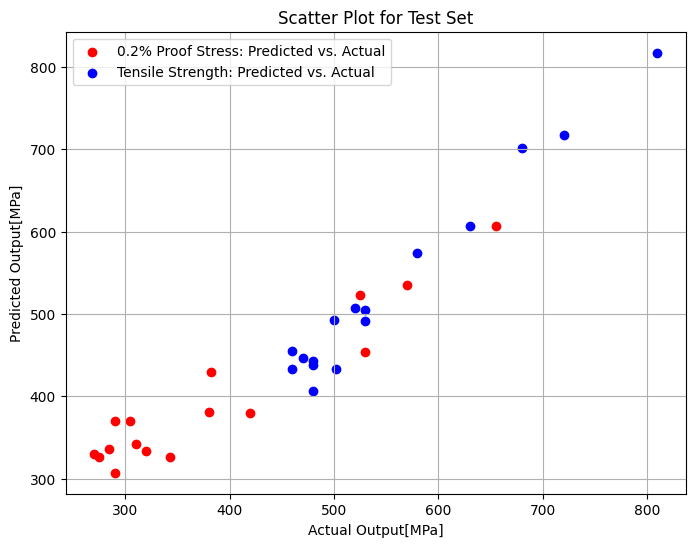

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test[:,0], result[:,0], c='r', label='0.2% Proof Stress: Predicted vs. Actual')
plt.scatter(y_test[:,1], result[:,1], c='b', label='Tensile Strength: Predicted vs. Actual')
plt.xlabel('Actual Output[MPa]')
plt.ylabel('Predicted Output[MPa]')
plt.title('Scatter Plot for Test Set')
plt.legend()
plt.grid(True)
plt.show()